In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

In [8]:
df = pd.read_csv("kaggle-preprocessed.csv")

## EDA

In [217]:
#Check in the Data
#The first 5 rows of the data
df.head(5)

,Unnamed: 0,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time,Dataset_link
0,0,Hotel Reservations Dataset,Ahsan Raza,https://www.kaggle.com/ahsan81,1,491 kB,CSV,315,Silver,10.0,1/04/2023,Wed,18:20:31,https://www.kaggle.com/datasets/ahsan81/hotel-...
1,2,Most Subscribed 1000 Youtube Channels,Mrityunjay Pathak,https://www.kaggle.com/themrityunjaypathak,1,29 kB,CSV,76,Bronze,10.0,1/21/2023,Sat,20:12:05,https://www.kaggle.com/datasets/themrityunjayp...
2,3,Olympics 124 years Dataset(till 2020),Nitish Sharma01,https://www.kaggle.com/nitishsharma01,3,5 MB,CSV,30,Bronze,10.0,2/01/2023,Wed,14:30:49,https://www.kaggle.com/datasets/nitishsharma01...
3,4,Medical Student Mental Health,The Devastator,https://www.kaggle.com/thedevastator,2,19 kB,CSV,37,Bronze,10.0,1/25/2023,Wed,06:30:14,https://www.kaggle.com/datasets/thedevastator/...
4,5,Latest Netflix TV shows and movies,Senapati Rajesh,https://www.kaggle.com/senapatirajesh,1,1 MB,CSV,94,Bronze,9.4,1/14/2023,Sat,22:33:12,https://www.kaggle.com/datasets/senapatirajesh...


In [219]:
#See all the columns of the data
df.columns

Index(['Unnamed: 0', 'Dataset_name', 'Author_name', 'Author_id', 'No_of_files',
       'size', 'Type_of_file', 'Upvotes', 'Medals', 'Usability', 'Date', 'Day',
       'Time', 'Dataset_link'],
      dtype='object')

In [221]:
#Size of the data
df.shape

(9158, 14)

In [223]:
#Check the data type of each data
df.dtypes

Unnamed: 0        int64
Dataset_name     object
Author_name      object
Author_id        object
No_of_files       int64
size             object
Type_of_file     object
Upvotes           int64
Medals           object
Usability       float64
Date             object
Day              object
Time             object
Dataset_link     object
dtype: object

In [300]:
#Select all numerical data 
num_col_df1 = df.select_dtypes(include=np.number)

In [302]:
num_col_list = df.select_dtypes(include=np.number).columns.tolist()

In [232]:
df.isna().sum()

Unnamed: 0      0
Dataset_name    0
Author_name     0
Author_id       0
No_of_files     0
size            0
Type_of_file    2
Upvotes         0
Medals          0
Usability       0
Date            0
Day             0
Time            0
Dataset_link    0
dtype: int64

In [239]:
categorical_columns_2

['Dataset_name',
 'Author_name',
 'Author_id',
 'size',
 'Type_of_file',
 'Medals',
 'Date',
 'Day',
 'Time',
 'Dataset_link']

In [247]:
categorical_columns_2 = df.select_dtypes(include='object').columns.tolist()

In [249]:
categorical_columns_2

['Dataset_name',
 'Author_name',
 'Author_id',
 'size',
 'Type_of_file',
 'Medals',
 'Date',
 'Day',
 'Time',
 'Dataset_link']

In [279]:
num_col_list = df.select_dtypes(include='number').columns.tolist()

In [265]:
num_col_df = df.select_dtypes(include='number')

In [310]:
df = df.dropna()

In [318]:
#Clean the data
df = df.dropna()

In [322]:
df["Date"]= pd.to_datetime(df["Date"])

In [326]:
df["Time"] = pd.to_datetime(df["Time"])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2656\3349344153.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"])


In [328]:
df.dtypes

Unnamed: 0               int64
Dataset_name            object
Author_name             object
Author_id               object
No_of_files              int64
size                    object
Type_of_file            object
Upvotes                  int64
Medals                  object
Usability              float64
Date            datetime64[ns]
Day                     object
Time            datetime64[ns]
Dataset_link            object
dtype: object

In [360]:
df.head(5)

,Unnamed: 0,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time
0,0,Hotel Reservations Dataset,Ahsan Raza,https://www.kaggle.com/ahsan81,1,491 kB,CSV,315,Silver,10.0,2023-01-04,Wed,2025-05-15 18:20:31
1,2,Most Subscribed 1000 Youtube Channels,Mrityunjay Pathak,https://www.kaggle.com/themrityunjaypathak,1,29 kB,CSV,76,Bronze,10.0,2023-01-21,Sat,2025-05-15 20:12:05
2,3,Olympics 124 years Dataset(till 2020),Nitish Sharma01,https://www.kaggle.com/nitishsharma01,3,5 MB,CSV,30,Bronze,10.0,2023-02-01,Wed,2025-05-15 14:30:49
3,4,Medical Student Mental Health,The Devastator,https://www.kaggle.com/thedevastator,2,19 kB,CSV,37,Bronze,10.0,2023-01-25,Wed,2025-05-15 06:30:14
4,5,Latest Netflix TV shows and movies,Senapati Rajesh,https://www.kaggle.com/senapatirajesh,1,1 MB,CSV,94,Bronze,9.4,2023-01-14,Sat,2025-05-15 22:33:12


In [10]:
df = df.drop(["Dataset_link"], axis = 1)

In [364]:
df = df.drop(["Author_id"], axis = 1)

In [366]:
df

,Unnamed: 0,Dataset_name,Author_name,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time
0,0,Hotel Reservations Dataset,Ahsan Raza,1,491 kB,CSV,315,Silver,10.0,2023-01-04,Wed,2025-05-15 18:20:31
1,2,Most Subscribed 1000 Youtube Channels,Mrityunjay Pathak,1,29 kB,CSV,76,Bronze,10.0,2023-01-21,Sat,2025-05-15 20:12:05
2,3,Olympics 124 years Dataset(till 2020),Nitish Sharma01,3,5 MB,CSV,30,Bronze,10.0,2023-02-01,Wed,2025-05-15 14:30:49
3,4,Medical Student Mental Health,The Devastator,2,19 kB,CSV,37,Bronze,10.0,2023-01-25,Wed,2025-05-15 06:30:14
4,5,Latest Netflix TV shows and movies,Senapati Rajesh,1,1 MB,CSV,94,Bronze,9.4,2023-01-14,Sat,2025-05-15 22:33:12
...,...,...,...,...,...,...,...,...,...,...,...,...
9153,9966,bankdata,Jochein,7,1 MB,"CSV, other",1,No Medal,1.8,2022-12-31,Sat,2025-05-15 14:38:17
9154,9967,Simpsons Episodes & Ratings (1989-),Jonathan Bown,2,163 kB,CSV,42,Silver,10.0,2022-12-27,Tue,2025-05-15 23:38:50
9155,9968,Video Game Dataset,Trung Hoang,1,22 MB,CSV,38,No Medal,8.2,2020-12-23,Wed,2025-05-15 10:24:53
9156,9969,deberta-v3-small,miwojc,6,600 MB,"other, JSON",3,No Medal,1.9,2022-04-21,Thu,2025-05-15 11:43:36


In [372]:
num_col = df.select_dtypes(include = "number").columns.tolist()

In [374]:
num_col

['Unnamed: 0', 'No_of_files', 'Upvotes', 'Usability']

In [384]:
cat_col = df.select_dtypes(include ="object").columns.tolist()

In [386]:
cat_col

['Dataset_name', 'Author_name', 'size', 'Type_of_file', 'Medals', 'Day']

In [388]:
#Find all the golddataset
goal_data_set = df[df["Medals"]=='Gold']

In [390]:
goal_data_set

,Unnamed: 0,Dataset_name,Author_name,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time
20,21,Melbourne Housing Snapshot,DanB,1,461 kB,CSV,1209,Gold,7.1,2018-06-05,Tue,2025-05-15 18:22:24
33,34,Trending YouTube Video Statistics,Mitchell J,20,211 MB,"CSV, JSON",4866,Gold,7.9,2019-06-03,Mon,2025-05-15 06:26:47
34,35,Wine Reviews,zackthoutt,3,53 MB,"CSV, JSON",3408,Gold,7.9,2017-11-27,Mon,2025-05-15 22:38:04
35,36,Mobile Price Classification,Abhishek Sharma,2,72 kB,CSV,1492,Gold,7.1,2018-01-28,Sun,2025-05-15 14:14:24
36,37,Ramen Ratings,Aleksey Bilogur,1,41 kB,CSV,829,Gold,7.1,2018-01-11,Thu,2025-05-15 21:34:39
...,...,...,...,...,...,...,...,...,...,...,...,...
8789,9551,siim_dicom_images,Abhishek Thakur,12090,2 GB,"other, CSV",86,Gold,2.9,2019-06-26,Wed,2025-05-15 21:36:21
8805,9568,Chai Time Data Science | CTDS.Show,Vopani,153,3 MB,"CSV, other",189,Gold,9.1,2020-07-23,Thu,2025-05-15 22:53:46
8807,9570,BSE STOCKS DATA - 15 Minute Interval ( Histori...,Saurabh Shahane,154,110 MB,other,64,Gold,5.0,2020-12-18,Fri,2025-05-15 15:45:36
9075,9878,Clubhouse Dataset 9.7M,Vahid,6,3 GB,other,195,Gold,9.4,2021-06-22,Tue,2025-05-15 10:41:06


In [396]:
num = df[num_col]
num['Upvotes'].max()

27619

In [404]:
num[num['Upvotes'] == num["Upvotes"].max()]

,Unnamed: 0,No_of_files,Upvotes,Usability
57,59,30,27619,8.2


In [435]:
#Find the mean and median of all the numerical variable
print("The mean \n",num.mean(), "\n") 
  
  
print("Median \n",num.median())

The mean 
 Unnamed: 0     4961.918196
No_of_files    5758.410987
Upvotes          73.435889
Usability         7.437331
dtype: float64 

Median 
 Unnamed: 0     4934.5
No_of_files       2.0
Upvotes          23.0
Usability         8.5
dtype: float64


In [447]:
#Select all the data where publish in 2020
new_df_2020 = df[df["Date"]>="2020-01-01"]

In [449]:
new_df_2020

,Unnamed: 0,Dataset_name,Author_name,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time
0,0,Hotel Reservations Dataset,Ahsan Raza,1,491 kB,CSV,315,Silver,10.0,2023-01-04,Wed,2025-05-15 18:20:31
1,2,Most Subscribed 1000 Youtube Channels,Mrityunjay Pathak,1,29 kB,CSV,76,Bronze,10.0,2023-01-21,Sat,2025-05-15 20:12:05
2,3,Olympics 124 years Dataset(till 2020),Nitish Sharma01,3,5 MB,CSV,30,Bronze,10.0,2023-02-01,Wed,2025-05-15 14:30:49
3,4,Medical Student Mental Health,The Devastator,2,19 kB,CSV,37,Bronze,10.0,2023-01-25,Wed,2025-05-15 06:30:14
4,5,Latest Netflix TV shows and movies,Senapati Rajesh,1,1 MB,CSV,94,Bronze,9.4,2023-01-14,Sat,2025-05-15 22:33:12
...,...,...,...,...,...,...,...,...,...,...,...,...
9153,9966,bankdata,Jochein,7,1 MB,"CSV, other",1,No Medal,1.8,2022-12-31,Sat,2025-05-15 14:38:17
9154,9967,Simpsons Episodes & Ratings (1989-),Jonathan Bown,2,163 kB,CSV,42,Silver,10.0,2022-12-27,Tue,2025-05-15 23:38:50
9155,9968,Video Game Dataset,Trung Hoang,1,22 MB,CSV,38,No Medal,8.2,2020-12-23,Wed,2025-05-15 10:24:53
9156,9969,deberta-v3-small,miwojc,6,600 MB,"other, JSON",3,No Medal,1.9,2022-04-21,Thu,2025-05-15 11:43:36


<h2>Visualization</h2>

<Axes: xlabel='Upvotes', ylabel='Day'>

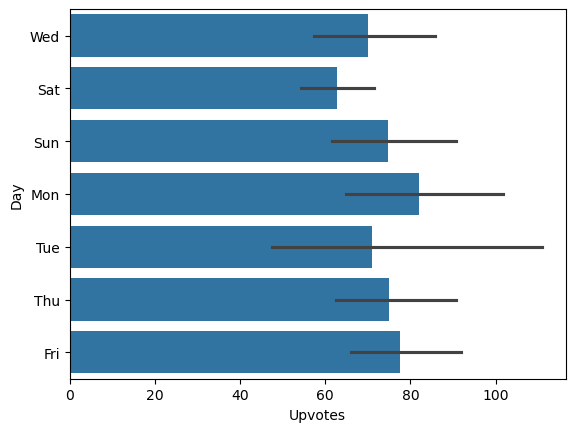

In [457]:
sns.barplot(x = df["Upvotes"], y = df["Day"])

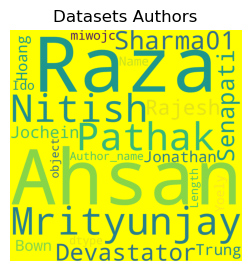

In [500]:
import wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'yellow',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Author_name"]))
plt.figure(figsize = (8,3))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Datasets Authors")
plt.show()

In [470]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Year which had maximum dataset uploads')

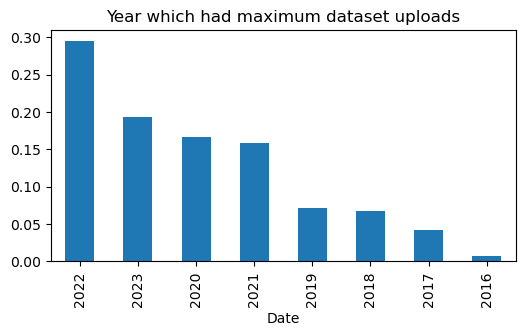

In [496]:
plt.figure(figsize = (6,3))
df['Date'].dt.year.value_counts(normalize=True).plot(kind='bar')
plt.title('Year which had maximum dataset uploads')


<h2>
    Author : 
     <h6>WEDSON PETIT HOMME </h6>
    <br>
    <h4> Contact :</h4>
    <li>Email : wedsonpetithomme0@gmail.com</li>
    <li> <a href = "https://www.linkedin.com/"> Linkedin :</a><a href = "https://www.linkedin.com/in/wedson-petithomme-947571239/">wedson-petit-homme-947571239 </a></li>
    <li><a href = "https://github.com/ALYProdz">GitHub :</a><a href = "https://github.com/ALYProdz">Wedson (ALYProdz) </a> </li>
    <li><a href = "https://x.com/"> X(Twitter) :</a> @WedsonPh97</li>
    <li><a href = https://www.datacamp.com/portfolio/wedsonpetithomme> Datacamp :</a><a href = "https://www.datacamp.com/portfolio/wedsonpetithomme"> WEDSON PETIT HOMME</a></li>
</h2>
